In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler


In [2]:
titan = pd.read_csv('train.csv')
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titan.shape

(891, 12)

In [4]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titan.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# null_values and treatment

In [8]:
titan.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [9]:
titan['Age'].median()

28.0

In [10]:
titan['Age'] = titan['Age'].fillna(titan['Age'].median())
titan['Age'].isnull().sum()

0

In [11]:
titan['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
titan['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [13]:
titan['Embarked'] = titan['Embarked'].fillna('S')
print('null values : ',titan['Embarked'].isnull().sum())
print(titan['Embarked'].value_counts())

null values :  0
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [14]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
titan['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [16]:
titan['Cabin'] = titan['Cabin'].fillna('C')
print('null values : ',titan['Cabin'].isnull().sum())
print(titan['Cabin'].value_counts())

null values :  0
C              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64


In [17]:
titan.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
titan.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# data analysis

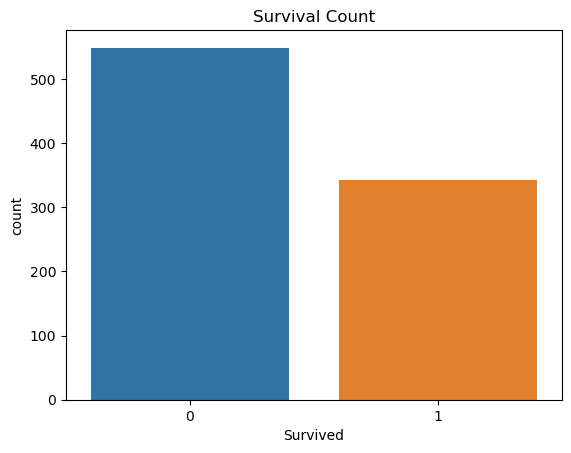

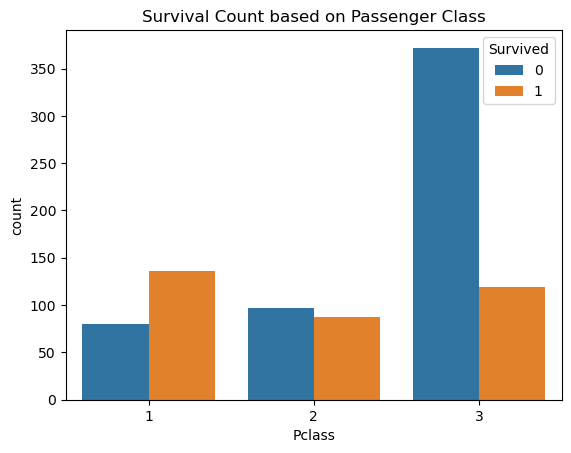

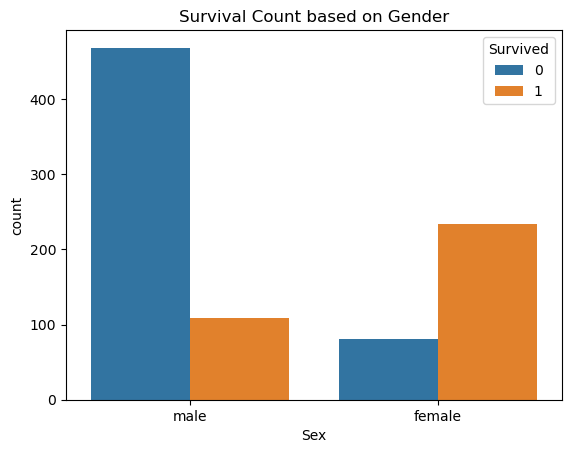

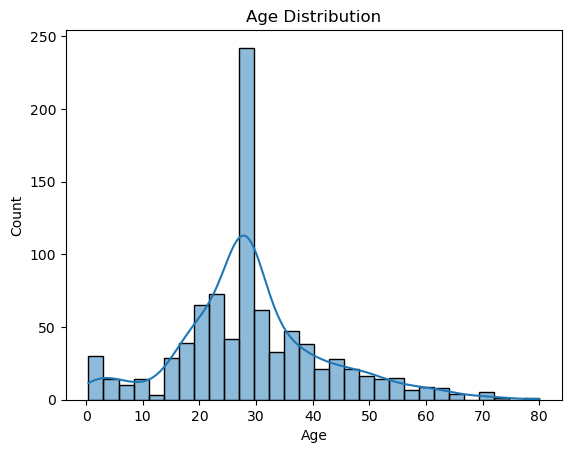

In [20]:
# Plot survival count
sns.countplot(x='Survived', data=titan)
plt.title('Survival Count')
plt.show()

# Plot survival count based on passenger class (pclass)
sns.countplot(x='Pclass', hue='Survived', data=titan)
plt.title('Survival Count based on Passenger Class')
plt.show()

# Plot survival count based on gender (sex)
sns.countplot(x='Sex', hue='Survived', data=titan)
plt.title('Survival Count based on Gender')
plt.show()

# Plot age distribution of passengers
sns.histplot(titan['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

In [21]:
# Create a new feature for family size
titan['family_size'] = titan['SibSp'] + titan['Parch'] + 1
titan['family_size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family_size, dtype: int64

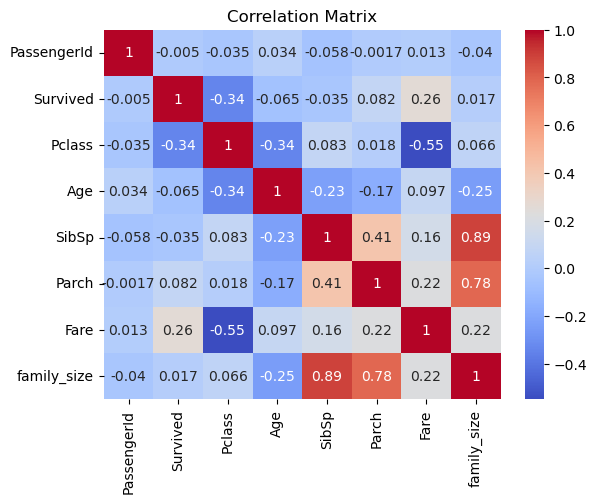

In [22]:
correlation_matrix = titan.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


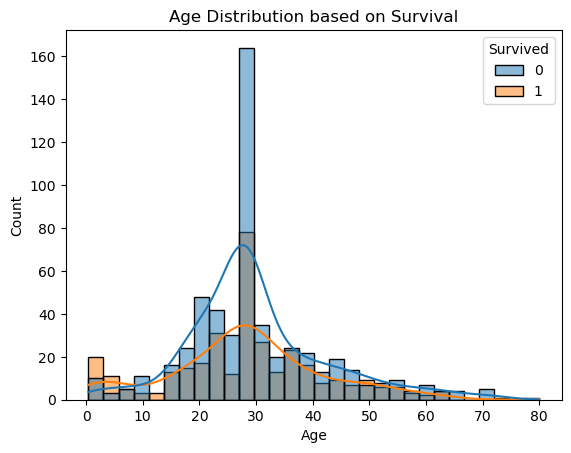

Average Age of Survivors: 28.29
Average Age of Non-Survivors: 30.03


In [23]:
# Plot age distribution based on survival
sns.histplot(data=titan, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution based on Survival')
plt.show()

# Calculate the average age of survivors and non-survivors
average_age_survived = titan[titan['Survived'] == 1]['Age'].mean()
average_age_not_survived = titan[titan['Survived'] == 0]['Age'].mean()
print(f"Average Age of Survivors: {average_age_survived:.2f}")
print(f"Average Age of Non-Survivors: {average_age_not_survived:.2f}")


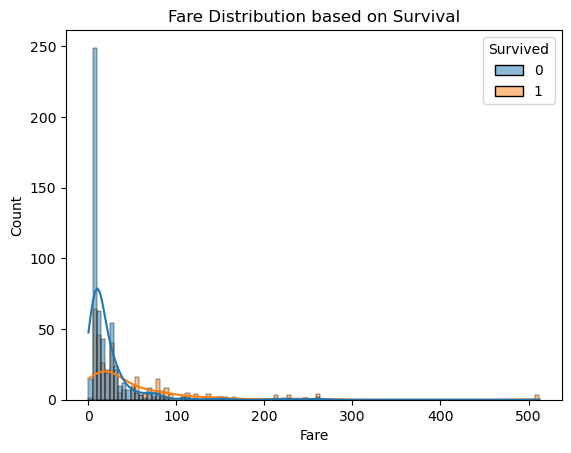

Average Fare of Survivors: 48.40
Average Fare of Non-Survivors: 22.12


In [24]:
# Plot fare distribution based on survival
sns.histplot(data=titan, x='Fare', hue='Survived', kde=True)
plt.title('Fare Distribution based on Survival')
plt.show()

# Calculate the average fare of survivors and non-survivors
average_fare_survived = titan[titan['Survived'] == 1]['Fare'].mean()
average_fare_not_survived = titan[titan['Survived'] == 0]['Fare'].mean()
print(f"Average Fare of Survivors: {average_fare_survived:.2f}")
print(f"Average Fare of Non-Survivors: {average_fare_not_survived:.2f}")


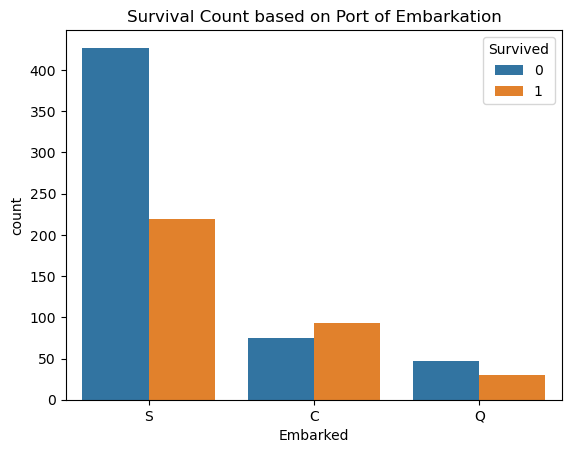

In [25]:
# Plot survival count based on the port of embarkation (embarked)
sns.countplot(x='Embarked', hue='Survived', data=titan)
plt.title('Survival Count based on Port of Embarkation')
plt.show()


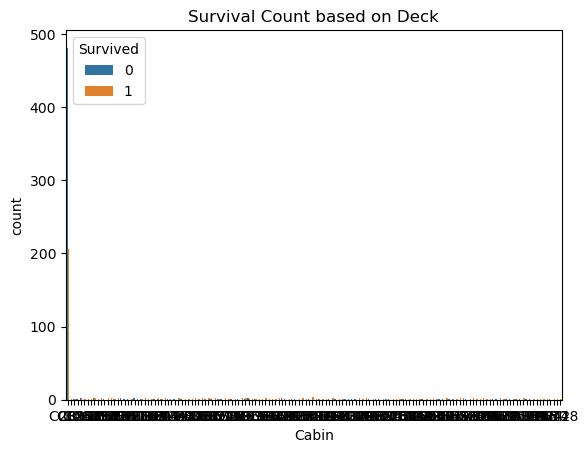

In [26]:
# Plot survival count based on the deck (deck)
sns.countplot(x='Cabin', hue='Survived', data=titan)
plt.title('Survival Count based on Deck')
plt.show()


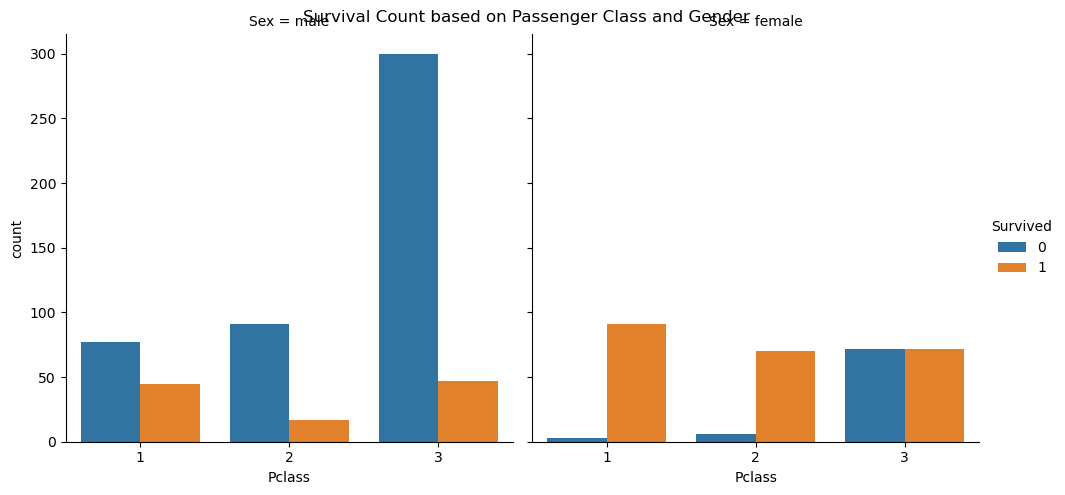

In [27]:
# Plot survival count based on passenger class and gender
sns.catplot(x='Pclass', hue='Survived', col='Sex', data=titan, kind='count')
plt.suptitle('Survival Count based on Passenger Class and Gender')
plt.show()


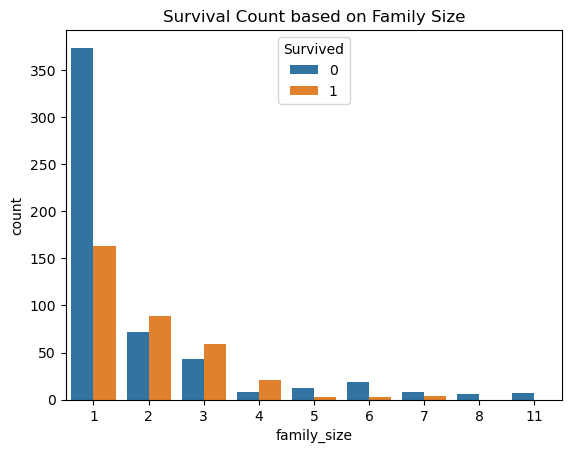

In [28]:
# Plot survival count based on family size
sns.countplot(x='family_size', hue='Survived', data=titan)
plt.title('Survival Count based on Family Size')
plt.show()


# statictical analysis

In [29]:
# Cross-tabulation of survival and passenger class
ctab = pd.crosstab(titan['Survived'], titan['Pclass'])
print(ctab)

# Chi-square test for passenger class and survival
from scipy.stats import chi2_contingency
chi2, p_val, dof, expected = chi2_contingency(ctab)
print(f"Chi-square test statistic: {chi2}")
print(f"P-value: {p_val}")


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Chi-square test statistic: 102.88898875696056
P-value: 4.549251711298793e-23


In [30]:
from scipy.stats import ttest_ind

# Separate age values for survivors and non-survivors
age_survived = titan[titan['Survived'] == 1]['Age']
age_not_survived = titan[titan['Survived'] == 0]['Age']

# Perform t-test
t_stat, p_value = ttest_ind(age_survived, age_not_survived, nan_policy='omit')

print(f"T-Test Result: t_stat = {t_stat}, p_value = {p_value}")


T-Test Result: t_stat = -1.9394659179476366, p_value = 0.0527606884758555


In [31]:
from scipy.stats import chi2_contingency

# Cross-tabulation of survival and passenger class
ctab = pd.crosstab(titan['Survived'], titan['Pclass'])

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(ctab)

print(f"Chi-Square Test Result: chi2 = {chi2}, p_value = {p_value}")


Chi-Square Test Result: chi2 = 102.88898875696056, p_value = 4.549251711298793e-23


In [32]:
from scipy.stats import f_oneway

# Separate fare values for each passenger class
fare_class1 = titan[titan['Pclass'] == 1]['Fare']
fare_class2 = titan[titan['Pclass'] == 2]['Fare']
fare_class3 = titan[titan['Pclass'] == 3]['Fare']

# Perform ANOVA
f_stat, p_value = f_oneway(fare_class1, fare_class2, fare_class3)

print(f"ANOVA Result: F-statistic = {f_stat}, p_value = {p_value}")


ANOVA Result: F-statistic = 242.34415651744814, p_value = 1.0313763209141171e-84


In [33]:
# Cross-tabulation of survival and embarked town
ctab_embarked = pd.crosstab(titan['Survived'], titan['Embarked'])

# Perform chi-square test
chi2_embarked, p_value_embarked, dof_embarked, expected_embarked = chi2_contingency(ctab_embarked)

print(f"Chi-Square Test Result for Embarked Town: chi2 = {chi2_embarked}, p_value = {p_value_embarked}")


Chi-Square Test Result for Embarked Town: chi2 = 25.964452881874784, p_value = 2.3008626481449577e-06


# encoding 

In [34]:
titan.select_dtypes(include=('object','category')).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = titan
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Cabin'] = label_encoder.fit_transform(df['Cabin'])
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,48,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,82,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,48,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,56,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,48,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,48,2,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,30,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,48,2,4
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,61,0,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
 12  family_size  891 non-null    int64  
dtypes: float64(2), int32(3), int64(6), object(2)
memory usage: 80.2+ KB


In [37]:
df.drop(['Name','Ticket'],axis = 1,inplace=True)

In [38]:
df_test = pd.read_csv('test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [39]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [41]:
# Mean imputation for 'Age' and 'Fare'
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

# Create a new category 'Unknown' for 'Cabin'
df_test['Cabin'] = df_test['Cabin'].fillna('Unknown')

In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [43]:
df_test.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [44]:
df_test.drop(['Name','Ticket'],axis =1,inplace=True)
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.50000,0,0,7.8292,Unknown,Q
1,893,3,female,47.00000,1,0,7.0000,Unknown,S
2,894,2,male,62.00000,0,0,9.6875,Unknown,Q
3,895,3,male,27.00000,0,0,8.6625,Unknown,S
4,896,3,female,22.00000,1,1,12.2875,Unknown,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,8.0500,Unknown,S
414,1306,1,female,39.00000,0,0,108.9000,C105,C
415,1307,3,male,38.50000,0,0,7.2500,Unknown,S
416,1308,3,male,30.27259,0,0,8.0500,Unknown,S


In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Cabin        418 non-null    object 
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [46]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
df_test['Sex'] = label_encoder.fit_transform(df_test['Sex'])
df_test['Embarked'] = label_encoder.fit_transform(df_test['Embarked'])
df_test['Cabin'] = label_encoder.fit_transform(df_test['Cabin'])
df_test


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1,34.50000,0,0,7.8292,76,1
1,893,3,0,47.00000,1,0,7.0000,76,2
2,894,2,1,62.00000,0,0,9.6875,76,1
3,895,3,1,27.00000,0,0,8.6625,76,2
4,896,3,0,22.00000,1,1,12.2875,76,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,8.0500,76,2
414,1306,1,0,39.00000,0,0,108.9000,22,0
415,1307,3,1,38.50000,0,0,7.2500,76,2
416,1308,3,1,30.27259,0,0,8.0500,76,2


In [53]:
print(df_test.shape)
print(titan.shape)

(418, 9)
(891, 11)


In [55]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [56]:
titan.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked', 'family_size'],
      dtype='object')

In [57]:
# Create a new feature for family size
df_test['family_size'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test['family_size'].value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: family_size, dtype: int64

In [58]:
# Prepare data for modeling
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))

Model Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       134
           1       0.74      0.72      0.73        89

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



In [59]:
test_predictions = model.predict(df_test)
test_predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [61]:
sub=pd.read_csv("gender_submission.csv")
sub['Survived']=test_predictions
sub.to_csv("submission.csv",index=False)

In [62]:
s = pd.read_csv('submission.csv')
s

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [63]:
# Initialize and train the random forest model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Model Accuracy: {accuracy:.2f}")
print('\n')
# Print classification report
print(classification_report(y_test, y_pred_rf))

Model Accuracy: 0.82


              precision    recall  f1-score   support

           0       0.82      0.89      0.85       134
           1       0.81      0.71      0.75        89

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.81       223



In [59]:
test_predictions = model.predict(df_test)
test_predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [64]:
sub=pd.read_csv("gender_submission.csv")
sub['Survived']=test_predictions
sub.to_csv("submission1.csv",index=False)

# scaling

In [65]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [66]:
# Initialize and train the logistic regression model with scaled data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (Logistic Regression with Scaling): {accuracy:.2f}")
print('\n')
print(classification_report(y_test, y_pred))

Model Accuracy (Logistic Regression with Scaling): 0.81


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       134
           1       0.77      0.74      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



In [67]:
# Initialize and train the random forest classifier model (no scaling needed)
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Model Accuracy (Random Forest Classifier): {accuracy_rf:.2f}")
print('\n')
print(classification_report(y_test, y_pred_rf))

Model Accuracy (Random Forest Classifier): 0.82


              precision    recall  f1-score   support

           0       0.83      0.88      0.86       134
           1       0.80      0.73      0.76        89

    accuracy                           0.82       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



In [68]:
# Initialize and train the logistic regression model with L2 regularization
alpha = 1.0  # Regularization strength (you can adjust this hyperparameter)
model = LogisticRegression(penalty='l2', C=1/alpha)  # C is the inverse of alpha
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.81
